In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
#tf.enable_eager_execution()

from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

import keras
import keras.backend
from keras import layers
from keras import models
import keras.utils

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import time
import h5py
import sklearn
from sklearn.utils import shuffle

import os



/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


Using TensorFlow backend.


In [2]:
data = np.load('/mnt/data/ml/Constituent4vecVariables.npz')
# !ls /mnt/data/ml/

labels = data['labels']

nconstituents = 3724300

varList = []
varNames = []
varDict = {}
varDictTrain = {}
varDictTest = {}

qcd_varDictTrain = {}
z1_varDictTrain = {}
z2_varDictTrain = {}
z3_varDictTrain = {}

qcd_varDictTest = {}
z1_varDictTest = {}
z2_varDictTest = {}
z3_varDictTest = {}

qcd_len = len(data['jetconstPt'][np.where(labels[:,0] == 1)])
z1_len = len(data['jetconstPt'][np.where(labels[:,1] == 1)])
z2_len = len(data['jetconstPt'][np.where(labels[:,2] == 1)])
z3_len = len(data['jetconstPt'][np.where(labels[:,3] == 1)])

qcd_len_test = 0
z1_len_test = 0
z2_len_test = 0
z3_len_test = 0

qcd_len_train = 0
z1_len_train = 0
z2_len_train = 0
z3_len_train = 0

qcd_mask_train = np.ones(shape=(qcd_len//20,20),dtype=bool)
qcd_mask_train[::4] = 0
qcd_mask_train[1::8] = 0

z1_mask_train = np.ones(shape=(z1_len//20,20),dtype=bool)
z1_mask_train[::4] = 0
z1_mask_train[1::8] = 0

z2_mask_train = np.ones(shape=(z2_len//20,20),dtype=bool)
z2_mask_train[::4] = 0
z2_mask_train[1::8] = 0

z3_mask_train = np.ones(shape=(z3_len//20,20),dtype=bool)
z3_mask_train[::4] = 0
z3_mask_train[1::8] = 0

for varName in data:
    if 'labels' in varName: continue
    if 'jetconstEvnum' in varName: continue
    var = data[varName]
    varList.append(var)
    varNames.append(varName)

    print(varName, var.shape)
    qcd_var = var[(np.where(labels[:,0] == 1))].reshape(qcd_len//20, 20)
    z1_var  = var[(np.where(labels[:,1] == 1))].reshape(z1_len//20, 20)
    z2_var  = var[(np.where(labels[:,2] == 1))].reshape(z2_len//20, 20)
    z3_var  = var[(np.where(labels[:,3] == 1))].reshape(z3_len//20, 20)

    qcd_var_train = qcd_var[qcd_mask_train]
    z1_var_train = z1_var[z1_mask_train]
    z2_var_train = z2_var[z2_mask_train]
    z3_var_train = z3_var[z3_mask_train]
   
    qcd_var_train = qcd_var_train.reshape(qcd_var_train.shape[0]//20,20)
    z1_var_train = z1_var_train.reshape(z1_var_train.shape[0]//20,20)
    z2_var_train = z2_var_train.reshape(z2_var_train.shape[0]//20,20)
    z3_var_train = z3_var_train.reshape(z3_var_train.shape[0]//20,20)
    
    qcd_var_test = qcd_var[::4]
    z1_var_test = z1_var[::4]
    z2_var_test = z2_var[::4]
    z3_var_test = z3_var[::4]
    
    if 'log_pt_c' in varName:
        qcd_len_train = qcd_var_train.shape[0]
        z1_len_train = z1_var_train.shape[0]
        z2_len_train = z2_var_train.shape[0]
        z3_len_train = z3_var_train.shape[0]
        
        qcd_len_test = qcd_var_test.shape[0]
        z1_len_test = z1_var_test.shape[0]
        z2_len_test = z2_var_test.shape[0]
        z3_len_test = z3_var_test.shape[0]
        
        
    
    stackVar = np.vstack((qcd_var, z1_var, z2_var, z3_var))
    stackVarTrain = np.vstack((qcd_var_train, z1_var_train, z2_var_train, z3_var_train))
    stackVarTest = np.vstack((qcd_var_test, z1_var_test, z2_var_test, z3_var_test))
    
    varDict.update({varName : stackVar})
    varDictTrain.update({varName : stackVarTrain})
    varDictTest.update({varName : stackVarTest})
    


jetconstPt (3724300,)
jetconstEta (3724300,)
jetconstPhi (3724300,)
log_pt_c (3724300,)
log_E_c (3724300,)
log_pt_c_jetpt (3724300,)
eta_c (3724300,)
dphi_c_jet (3724300,)
deta_c_jet (3724300,)
dr_c_jet (3724300,)
dr_c_subjet1 (3724300,)
dr_c_subjet2 (3724300,)
charge_c (3724300,)
dxy_c (3724300,)
dz_c (3724300,)


In [3]:
print(varDictTest['log_pt_c'])

[[3.19803476 2.73548007 2.14757681 ... 6.90675497 6.90675497 6.90675497]
 [3.13874578 3.01565266 2.87748265 ... 0.92325628 0.88973433 0.61399031]
 [3.05021    2.83103776 2.28861547 ... 1.21322513 0.99540603 0.93915218]
 ...
 [4.95878506 4.81786489 4.49727821 ... 2.30434155 2.13512635 1.99756002]
 [5.70964718 5.04606056 4.74804926 ... 0.0423055  6.90675497 6.90675497]
 [4.23897219 4.20071697 3.85698795 ... 2.25985527 2.23897171 2.18535042]]


In [4]:

qcd_lab = np.zeros([qcd_len, 2])
qcd_lab[:,0] = 1
z_lab = np.zeros([z1_len+z2_len+z3_len, 2])
z_lab[:,1] = 1

qcd_lab_train = np.zeros([qcd_len_train, 2])
qcd_lab_train[:,0] = 1
z_lab_train = np.zeros([z1_len_train+z2_len_train+z3_len_train, 2])
z_lab_train[:,1] = 1

qcd_lab_test = np.zeros([qcd_len_test, 2])
qcd_lab_test[:,0] = 1
z_lab_test = np.zeros([z1_len_test+z2_len_test+z3_len_test, 2])
z_lab_test[:,1] = 1

labels = np.vstack((qcd_lab, z_lab))
trainlabels = np.vstack((qcd_lab_train, z_lab_train))
testlabels = np.vstack((qcd_lab_test, z_lab_test))



print(trainlabels.shape[0])
print(varDictTrain['log_pt_c'].shape)

116382
(116382, 20)


In [5]:
variables = ['log_E_c', 
 #            'log_E_c', 
#              'log_pt_c_jetpt', 
#              'eta_c', 
#              'dphi_c_jet', 
#              'deta_c_jet', 
#              'dr_c_jet', 
#              'dr_c_subjet1', 
#              'dr_c_subjet2', 
#              'charge_c', 
#              'dxy_c', 
#             'dz_c'
            ]
# n = 1
variables_in_plots = '__log_pt_c'
# variable_list = ''
for var in variables:
    variables_in_plots += '__'+var
#     variable_list += var+' '
#     print(variable_list)
#     print('!['+str(n)+' vars](ROC_'+variables_in_plots+'.png)')
#     n += 1

In [6]:
# batch = np.vstack((varDict['log_pt_c'].flatten(),
#                    varDict['log_E_c'].flatten(),
#                    varDict['log_pt_c_jetpt'].flatten(),
#                    varDict['eta_c'].flatten(),
# #                    varDict['dphi_c_jet'].flatten(),
# #                    varDict['deta_c_jet'].flatten(),
# #                    varDict['dr_c_jet'].flatten(),
# #                    varDict['dr_c_subjet1'].flatten(),
# #                    varDict['dr_c_subjet2'].flatten(),
# #                    varDict['charge_c'].flatten(),
# #                    varDict['dxy_c'].flatten(),
# #                    varDict['dz_c'].flatten(),
#                   )).T

# trainbatch = np.vstack((varDictTrain['log_pt_c'].flatten(),
#                    varDictTrain['log_E_c'].flatten(),
#                    varDictTrain['log_pt_c_jetpt'].flatten(),
#                    varDictTrain['eta_c'].flatten(),
# #                    varDictTrain['dphi_c_jet'].flatten(),
# #                    varDictTrain['deta_c_jet'].flatten(),
# #                    varDictTrain['dr_c_jet'].flatten(),
# #                    varDictTrain['dr_c_subjet1'].flatten(),
# #                    varDictTrain['dr_c_subjet2'].flatten(),
# #                    varDictTrain['charge_c'].flatten(),
# #                    varDictTrain['dxy_c'].flatten(),
# #                    varDictTrain['dz_c'].flatten(),
#                   )).T

# testbatch = np.vstack((varDictTest['log_pt_c'].flatten(),
#                    varDictTest['log_E_c'].flatten(),
#                    varDictTest['log_pt_c_jetpt'].flatten(),
#                    varDictTest['eta_c'].flatten(),
# #                    varDictTest['dphi_c_jet'].flatten(),
# #                    varDictTest['deta_c_jet'].flatten(),
# #                    varDictTest['dr_c_jet'].flatten(),
# #                    varDictTest['dr_c_subjet1'].flatten(),
# #                    varDictTest['dr_c_subjet2'].flatten(),
# #                    varDictTest['charge_c'].flatten(),
# #                    varDictTest['dxy_c'].flatten(),
# #                    varDictTest['dz_c'].flatten(),
#                   )).T


In [7]:
# batch = np.vstack((varDict['jetconstPt'].flatten(), varDict['jetconstEta'].flatten(), varDict['jetconstPhi'].flatten(), varDict['jetconstPt'].flatten())).T

# trainbatch = np.vstack((varDictTrain['jetconstPt'].flatten(), varDictTrain['jetconstEta'].flatten(), varDictTrain['jetconstPhi'].flatten(), varDictTrain['jetconstPt'].flatten())).T

# testbatch = np.vstack((varDictTest['jetconstPt'].flatten(), varDictTest['jetconstEta'].flatten(), varDictTest['jetconstPhi'].flatten(), varDictTest['jetconstPt'].flatten())).T

batch = varDict['log_pt_c']
trainbatch = varDictTrain['log_pt_c']
testbatch = varDictTest['log_pt_c']

print(batch.shape)

nVar = len(variables)

# batch = batch.reshape((batch.shape[0]//20, 20, nVar))
# trainbatch = trainbatch.reshape((trainbatch.shape[0]//20, 20, nVar))
# testbatch = testbatch.reshape((testbatch.shape[0]//20, 20, nVar))

batch = batch.reshape((batch.shape[0], batch.shape[1], 1))
trainbatch = trainbatch.reshape((trainbatch.shape[0], trainbatch.shape[1], 1))
testbatch = testbatch.reshape((testbatch.shape[0], testbatch.shape[1], 1))


example_batch = trainbatch[::300]
example_labels = trainlabels[::300]
train_variables = [trainbatch]
 

#variables = ['log_pt_c']

example_variables = [example_batch]
train_variables = [trainbatch]
test_variables = [testbatch]

print(example_batch.shape)
print(example_labels.shape)

for var in variables:
    
    trainVar = varDictTrain[var] #.reshape(tvarShape//20, 20)

#     example_variables.append(trainVar[::300])
#     train_variables.append(trainVar) #.reshape(len(varDictTrain[var])//20, 20))
#     test_variables.append(varDictTest[var]) #.reshape(len(varDictTest[var])//20, 20))
    
    example_variables.append(trainVar[::300].reshape(trainVar[::300].shape[0], trainVar[::300].shape[1], 1))
    train_variables.append(trainVar.reshape(trainVar.shape[0], trainVar.shape[1], 1))
    test_variables.append(varDictTest[var].reshape(varDictTest[var].shape[0], varDictTest[var].shape[1], 1))

    

print('labels', labels.shape)
print('batch', batch.shape)
print('train labels', trainlabels.shape)
print('train batch', trainbatch.shape)
print('test labels', testlabels.shape)
print('test batch', testbatch.shape)

(186215, 20)
(388, 20, 1)
(388, 2)
labels (3724300, 2)
batch (186215, 20, 1)
train labels (116382, 2)
train batch (116382, 20, 1)
test labels (46555, 2)
test batch (46555, 20, 1)


In [8]:
for exvar in example_variables:
    print(exvar.reshape(exvar.shape[0], exvar.shape[1], 1).shape)
print()   
for trvar in train_variables:
    print(trvar.shape)
print()
for tevar in test_variables:
    print(tevar.shape)

(388, 20, 1)
(388, 20, 1)

(116382, 20, 1)
(116382, 20, 1)

(46555, 20, 1)
(46555, 20, 1)


In [9]:
def build_model():
    
    input1 = layers.Input(shape = (20,1))
        
    x1 = layers.Conv1D(64, 3, padding = 'same', activation='relu')(input1)
    x1 = layers.Conv1D(64, 1, padding = 'same', activation='relu')(x1)
    x1 = layers.MaxPool1D(2)(x1)
    x1 = layers.Conv1D(32, 3, padding = 'same', activation='relu')(x1)
    x1 = layers.Conv1D(32, 1, padding = 'same', activation='relu')(x1)
    x1 = layers.MaxPool1D()(x1)
    x1 = layers.Flatten()(x1)
    
    input2 = layers.Input(shape = (20,1))
        
    x2 = layers.Conv1D(64, 3, padding = 'same', activation='relu')(input2)
    x2 = layers.Conv1D(64, 1, padding = 'same', activation='relu')(x2)
    x2 = layers.MaxPool1D(2)(x2)
    x2 = layers.Conv1D(32, 3, padding = 'same', activation='relu')(x2)
    x2 = layers.Conv1D(32, 1, padding = 'same', activation='relu')(x2)
    x2 = layers.MaxPool1D()(x2)
    x2 = layers.Flatten()(x2)


    
    
#     inpts = []
#     for i in range(n):
#         inpt = layers.Input(shape=(20,))
#         inpts.append(inpt)
    x = layers.concatenate(inputs=[x1,x2], axis=-1)
    
#     input2 = layers.Input(shape = (20,1))
#     x2 = layers.Dense(64, activation='relu')(input2)
#     input3 = layers.Input(shape = (20,1))
#     x3 = layers.Dense(64, activation='relu')(input3)
#     x = layers.Add()([x2, x3])
    
    output = layers.Dense(2, activation='softmax')(x)
    model = models.Model(inputs=[input1,input2], outputs=output)
    #model = models.Model(inputs=[input1], outputs=output)
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['categorical_crossentropy', 'accuracy'])
    
    return model

In [10]:
#CNN = build_model(len(example_variables)-1)
#CNN = build_model(example_variables[0].shape[2])
CNN = build_model()


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
example_result = CNN.predict(x = example_variables)
results = CNN.evaluate(x = example_variables, y = example_labels, verbose = 0)
print(example_result)
print(results)

[[0.46938226 0.53061783]
 [0.42678332 0.5732166 ]
 [0.4652228  0.53477716]
 [0.4735757  0.5264243 ]
 [0.3974225  0.6025775 ]
 [0.47174627 0.5282538 ]
 [0.460906   0.53909403]
 [0.47679687 0.52320313]
 [0.4785553  0.52144474]
 [0.48612723 0.51387274]
 [0.46144718 0.53855276]
 [0.45037875 0.5496213 ]
 [0.47551882 0.5244812 ]
 [0.4797934  0.52020663]
 [0.5077226  0.4922774 ]
 [0.48003402 0.519966  ]
 [0.46969578 0.5303042 ]
 [0.4678218  0.53217816]
 [0.47777787 0.52222216]
 [0.48134875 0.51865125]
 [0.4729133  0.5270868 ]
 [0.47548562 0.5245143 ]
 [0.45938215 0.5406179 ]
 [0.4594172  0.5405828 ]
 [0.46715745 0.5328426 ]
 [0.4634206  0.5365794 ]
 [0.4074084  0.59259164]
 [0.47769246 0.5223075 ]
 [0.46912822 0.5308718 ]
 [0.42200592 0.57799405]
 [0.48760948 0.5123905 ]
 [0.44175357 0.5582465 ]
 [0.4896034  0.51039654]
 [0.42342117 0.5765788 ]
 [0.47883576 0.5211643 ]
 [0.39807162 0.60192835]
 [0.46399173 0.53600824]
 [0.45031494 0.549685  ]
 [0.4769909  0.52300906]
 [0.4701773  0.5298227 ]


In [12]:
#circleCNN = build_model( len(example_variables)-1 )
#circleCNN = build_model(example_variables[0].shape[2])
circleCNN = build_model()

In [13]:
example_result = circleCNN.predict(x = example_variables)
results = circleCNN.evaluate(x = example_variables, y = example_labels)
print(example_result)
#print(results)

388/388 [==============================] - 0s 174us/step
[[0.44158858 0.5584114 ]
 [0.37193057 0.6280694 ]
 [0.4447247  0.55527526]
 [0.45536578 0.54463416]
 [0.39875993 0.6012401 ]
 [0.447067   0.55293304]
 [0.43812677 0.5618732 ]
 [0.45168006 0.5483199 ]
 [0.4666679  0.5333321 ]
 [0.4620351  0.53796494]
 [0.44811165 0.55188835]
 [0.44589597 0.554104  ]
 [0.45109695 0.54890305]
 [0.45876706 0.54123294]
 [0.45919323 0.5408068 ]
 [0.4509261  0.5490739 ]
 [0.44805068 0.5519493 ]
 [0.42321828 0.57678175]
 [0.42584765 0.5741524 ]
 [0.41971925 0.5802807 ]
 [0.4534351  0.54656494]
 [0.45941886 0.54058117]
 [0.44986814 0.55013186]
 [0.43765315 0.5623468 ]
 [0.3675307  0.63246924]
 [0.43673617 0.56326383]
 [0.396933   0.60306704]
 [0.4425944  0.55740553]
 [0.44398603 0.556014  ]
 [0.36445537 0.6355446 ]
 [0.45063215 0.54936785]
 [0.43339506 0.5666049 ]
 [0.4613933  0.53860664]
 [0.41279504 0.58720493]
 [0.45320818 0.54679185]
 [0.3985804  0.6014196 ]
 [0.4293343  0.5706657 ]
 [0.43247783 0.567

In [14]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
    
checkpoint_path = "model/CNN_cat_multi_input_1DCNN.h5"
if not os.path.exists("model"):
    os.mkdir("model")

# Create checkpoint callback
# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
#                                                  save_best_only=True,
#                                                  verbose=1)
model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', 
                                   verbose=1, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)    
EPOCHS = 10
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = circleCNN.fit(
  train_variables, trainlabels,
  epochs=EPOCHS, validation_split = 0.2, verbose = 0,
  callbacks=[early_stop, model_checkpoint])

Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_loss improved from inf to 0.15805, saving model to model/CNN_cat_multi_input_1DCNN.h5

Epoch 00002: val_loss improved from 0.15805 to 0.12246, saving model to model/CNN_cat_multi_input_1DCNN.h5

Epoch 00003: val_loss improved from 0.12246 to 0.11761, saving model to model/CNN_cat_multi_input_1DCNN.h5

Epoch 00004: val_loss did not improve from 0.11761

Epoch 00005: val_loss improved from 0.11761 to 0.10183, saving model to model/CNN_cat_multi_input_1DCNN.h5

Epoch 00006: val_loss did not improve from 0.10183

Epoch 00007: val_loss did not improve from 0.10183

Epoch 00008: val_loss did not improve from 0.10183

Epoch 00009: val_loss did not improve from 0.10183

Epoch 00010: val_loss did not improve from 0.10183


In [15]:
!ls model
best_model = keras.models.load_model('model/CNN_cat_multi_input_1DCNN.h5')
best_model.summary()
results = best_model.evaluate(test_variables, testlabels)
print(results)

CNN_cat_multi_7inputs.h5
CNN_cat_multi_input_1DCNN.h5
CNN_cat_multi_input_3inputs.h5
CNN_cat_multi_input_4inputs.h5
CNN_cat_multi_input_5E.h5
CNN_cat_multi_input.h5
CNN_cat_multi_input_tau_chmult_5epochs.h5
CNN_cat_multi_input_tau_chmult_phomult2.h5
CNN_cat_multi_input_tau_chmult_phomult_5epochs.h5
CNN_cat_multi_input_tau_chmult_phomult.h5
CNN_cat_multi_input_tau_pull.h5
CNN_cat_multi_input_taus.h5
CNN_sparce_cat.h5
RNN.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 20, 1)        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 20, 1)        0                                            
______________________________________________________________________________

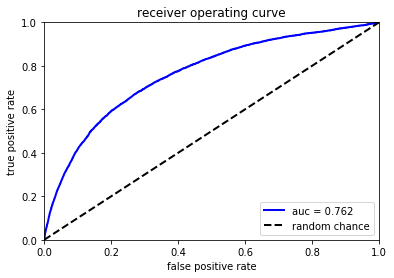

In [16]:
# Plot ROC

#predict = best_model.predict([testimages, testtaus, testmults])
predict = best_model.predict(test_variables)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(testlabels[:,0], predict[:,0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color='b', label='auc = %.3f' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating curve')
plt.legend(loc="lower right")
plt.savefig('ROC_'+variables_in_plots+'.png')
plt.show()

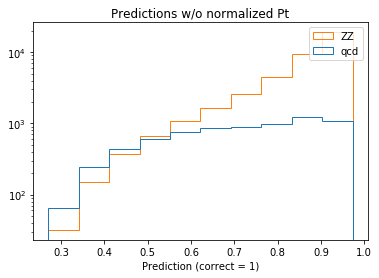

In [17]:
indqcd = np.argwhere(testlabels[:,0] == 1)
ind1  = np.where(testlabels[:,1] == 1)
hist_, bin_edges_ = np.histogram(predict[indqcd])
plt.hist([predict[indqcd, 1].flatten(),predict[ind1, 1].flatten()] , histtype = 'step', label = ['qcd', 'ZZ'])
plt.legend()
plt.title('Predictions w/o normalized Pt')
plt.yscale('log')
plt.xlabel('Prediction (correct = 1)')
plt.show()

In [18]:
import innvestigate
import innvestigate.utils as iutils

In [19]:
best_model_wo_softmax = innvestigate.utils.keras.graph.model_wo_softmax(best_model)


In [20]:
best_model_lrp = innvestigate.analyzer.relevance_based.relevance_analyzer.LRPZ(best_model_wo_softmax)
analysis = best_model_lrp.analyze(test_variables)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
